In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
!pip install contextily
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely import wkt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving dataset_uber.csv to dataset_uber (1).csv


In [7]:
df = pd.read_csv('dataset_uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
494,30223209,2010-02-24 12:43:07.0000002,23.7,2010-02-24 12:43:07 UTC,-73.962734,40.804368,-74.013890,40.702400,3
495,1204312,2012-06-03 12:18:02.0000001,25.7,2012-06-03 12:18:02 UTC,-73.862765,40.770908,-73.989013,40.688776,1
496,2511529,2014-12-24 05:54:45.0000001,8.0,2014-12-24 05:54:45 UTC,-73.918530,40.743330,-73.946696,40.749438,1
497,24116460,2010-01-18 02:18:16.0000001,10.5,2010-01-18 02:18:16 UTC,-74.005734,40.743641,-74.006287,40.708330,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         499 non-null    int64  
 1   key                499 non-null    object 
 2   fare_amount        499 non-null    float64
 3   pickup_datetime    499 non-null    object 
 4   pickup_longitude   499 non-null    float64
 5   pickup_latitude    499 non-null    float64
 6   dropoff_longitude  499 non-null    float64
 7   dropoff_latitude   499 non-null    float64
 8   passenger_count    499 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 35.2+ KB


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [11]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [14]:
if 'trip_id' in df.columns:
    df['trip_id'] = df['trip_id'].fillna('Unknown')

if 'color' in df.columns:
    df['color'] = df['color'].fillna('Unknown')

In [16]:
peta_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

df_nyc = df[
    (df['pickup_latitude'] >= 40.5) & (df['pickup_latitude'] <= 40.9) &
    (df['pickup_longitude'] >= -74.25) & (df['pickup_longitude'] <= -73.7)
]

data_heatmap = df_nyc[['pickup_latitude', 'pickup_longitude']].values.tolist()

HeatMap(data_heatmap, radius=12, blur=15, max_zoom=6).add_to(peta_nyc)

peta_nyc

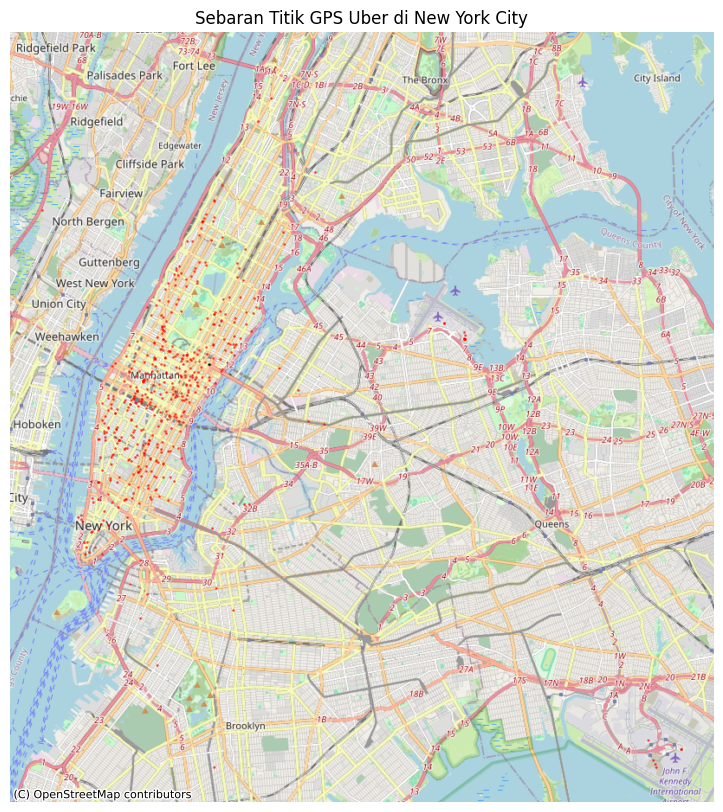

In [18]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

df_nyc = df[
    (df['pickup_latitude'] >= 40.5) & (df['pickup_latitude'] <= 40.9) &
    (df['pickup_longitude'] >= -74.25) & (df['pickup_longitude'] <= -73.7)
]

geometry = [Point(xy) for xy in zip(df_nyc['pickup_longitude'], df_nyc['pickup_latitude'])]
gdf = gpd.GeoDataFrame(df_nyc, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, markersize=1, alpha=0.5, color='red')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Sebaran Titik GPS Uber di New York City")
ax.set_axis_off()
plt.show()

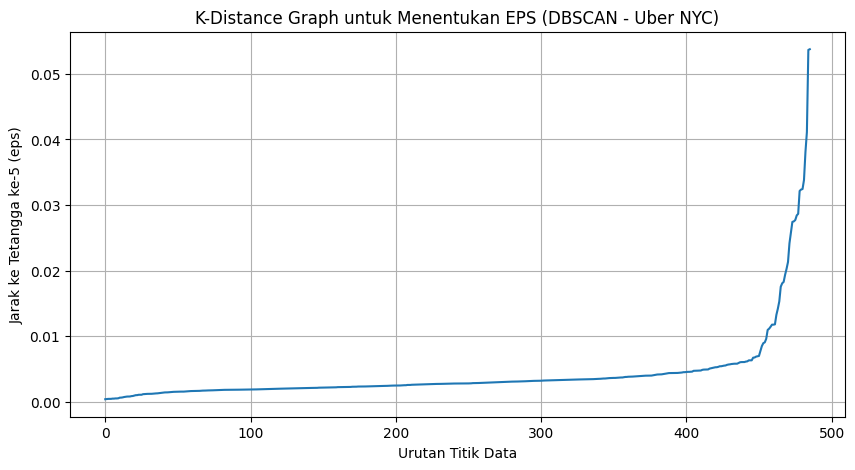

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


coords_sample = df[
    (df['pickup_latitude'] >= 40.5) & (df['pickup_latitude'] <= 40.9) &
    (df['pickup_longitude'] >= -74.25) & (df['pickup_longitude'] <= -73.7)
][['pickup_latitude', 'pickup_longitude']].values[:100000]


neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(coords_sample)
distances, indices = neighbors_fit.kneighbors(coords_sample)


distances = np.sort(distances[:, 4])

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-Distance Graph untuk Menentukan EPS (DBSCAN - Uber NYC)")
plt.xlabel("Urutan Titik Data")
plt.ylabel("Jarak ke Tetangga ke-5 (eps)")
plt.grid(True)
plt.show()


In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# === DBSCAN (pakai eps hasil K-Distance Graph) ===
dbscan_sample = DBSCAN(eps=0.0013, min_samples=5)
labels_sample = dbscan_sample.fit_predict(coords_sample)

# === Hitung Silhouette Score ===
# Silhouette TIDAK menghitung noise (-1)
mask = labels_sample != -1

unique_clusters = set(labels_sample[mask])

if len(unique_clusters) > 1:
    sil_score = silhouette_score(coords_sample[mask], labels_sample[mask])
    print("Silhouette Score (tanpa noise):", sil_score)
else:
    print("Silhouette Score tidak dapat dihitung (cluster valid < 2)")


Silhouette Score (tanpa noise): 0.7495999647372283


In [25]:
import folium
import pandas as pd

df_map = pd.DataFrame({
    'latitude': coords_sample[:,0],
    'longitude': coords_sample[:,1],
    'cluster': labels_sample
})

peta = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

def warna(cluster):
    cluster = int(cluster)
    if cluster == -1:
        return 'black'
    warna_list = ['red','blue','green','purple','orange','cadetblue','darkred']
    return warna_list[cluster % len(warna_list)]

for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color=warna(row['cluster']),
        fill=True,
        fill_opacity=0.6
    ).add_to(peta)

peta



In [26]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Data dari hasil DBSCAN
df_map = pd.DataFrame({
    'latitude': coords_sample[:, 0],
    'longitude': coords_sample[:, 1],
    'cluster': labels_sample
})

# Peta NYC
peta_cluster = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=11
)

# Warna cluster
def get_color(label):
    label = int(label)
    if label == -1:
        return 'black'
    return f'#{hex((label * 123457) % 0xFFFFFF)[2:].zfill(6)}'

# Marker Cluster
marker_cluster = MarkerCluster().add_to(peta_cluster)

# Plot titik
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color=get_color(row['cluster']),
        fill=True,
        fill_opacity=0.8
    ).add_to(marker_cluster)

peta_cluster


In [27]:
import numpy as np

# Hitung cluster valid & noise
labels = np.array(labels_sample)

unique_clusters = set(labels)
unique_clusters.discard(-1)   # buang noise

jumlah_cluster = len(unique_clusters)
jumlah_noise = np.sum(labels == -1)
persen_noise = (jumlah_noise / len(labels)) * 100

print("Jumlah cluster valid:", jumlah_cluster)
print("Jumlah noise:", jumlah_noise)
print(f"Persentase noise: {persen_noise:.2f}%")


Jumlah cluster valid: 7
Jumlah noise: 435
Persentase noise: 89.51%
